## Importing liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading data

In [2]:
# Load combined dataset
df = pd.read_csv('../data/raw/combined_data.csv')

In [3]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,TSLA
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,TSLA
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,TSLA
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,TSLA
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,TSLA
...,...,...,...,...,...,...,...,...
7417,2024-10-24 00:00:00+00:00,579.239990,579.239990,580.059998,576.570007,579.979980,34979900,SPY
7418,2024-10-25 00:00:00+00:00,579.039978,579.039978,584.460022,578.080017,581.510010,47268200,SPY
7419,2024-10-28 00:00:00+00:00,580.830017,580.830017,582.710022,580.520020,582.580017,30174700,SPY
7420,2024-10-29 00:00:00+00:00,581.770020,581.770020,582.909973,578.429993,579.849976,42899700,SPY


In [4]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Ticker'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7422 non-null   object 
 1   Adj Close  7422 non-null   float64
 2   Close      7422 non-null   float64
 3   High       7422 non-null   float64
 4   Low        7422 non-null   float64
 5   Open       7422 non-null   float64
 6   Volume     7422 non-null   int64  
 7   Ticker     7422 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 464.0+ KB


In [6]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
dtype: int64

In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000,7.422000e+03
mean,163.927123,174.126213,175.565281,172.560770,174.117405,6.828205e+07
std,138.439910,141.478774,142.521272,140.335014,141.474531,6.840786e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,0.000000e+00
25%,65.870977,73.962500,74.089996,73.790001,73.949997,5.522625e+06
50%,78.733364,87.625000,87.730000,87.500000,87.645000,6.268465e+07
75%,250.241074,267.692513,271.127510,265.347504,268.007507,9.717548e+07
max,584.590027,584.590027,586.119995,582.580017,585.909973,9.140820e+08


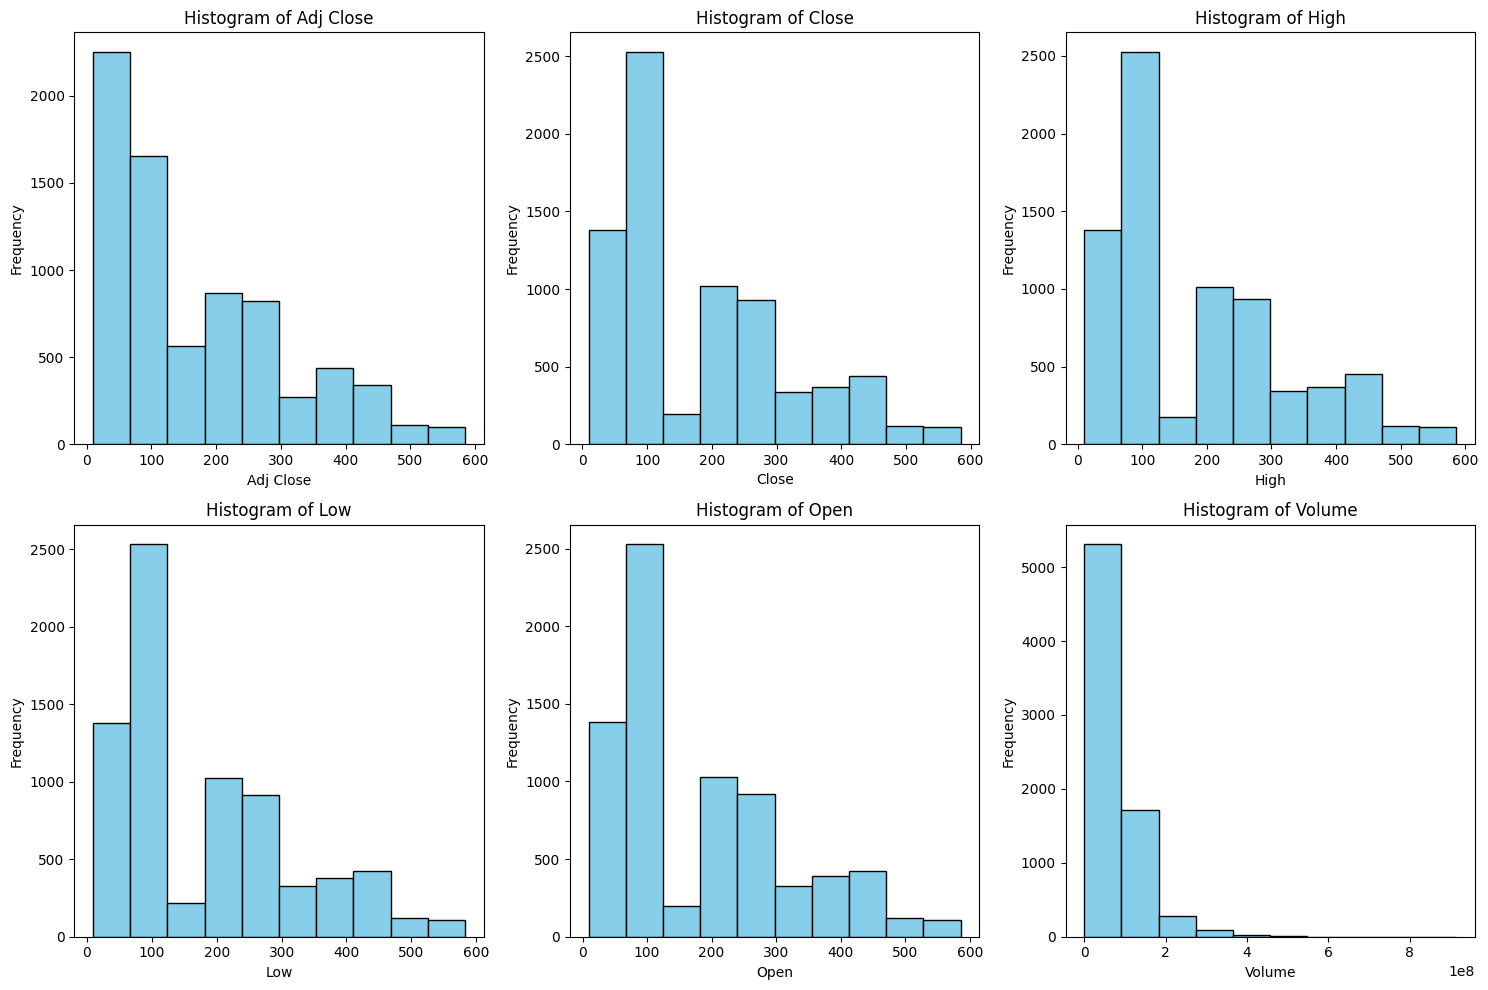

In [8]:
# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

for ax, col in zip(axes.flatten(), columns):
    ax.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize the Closing Price Over Time for Each Asset

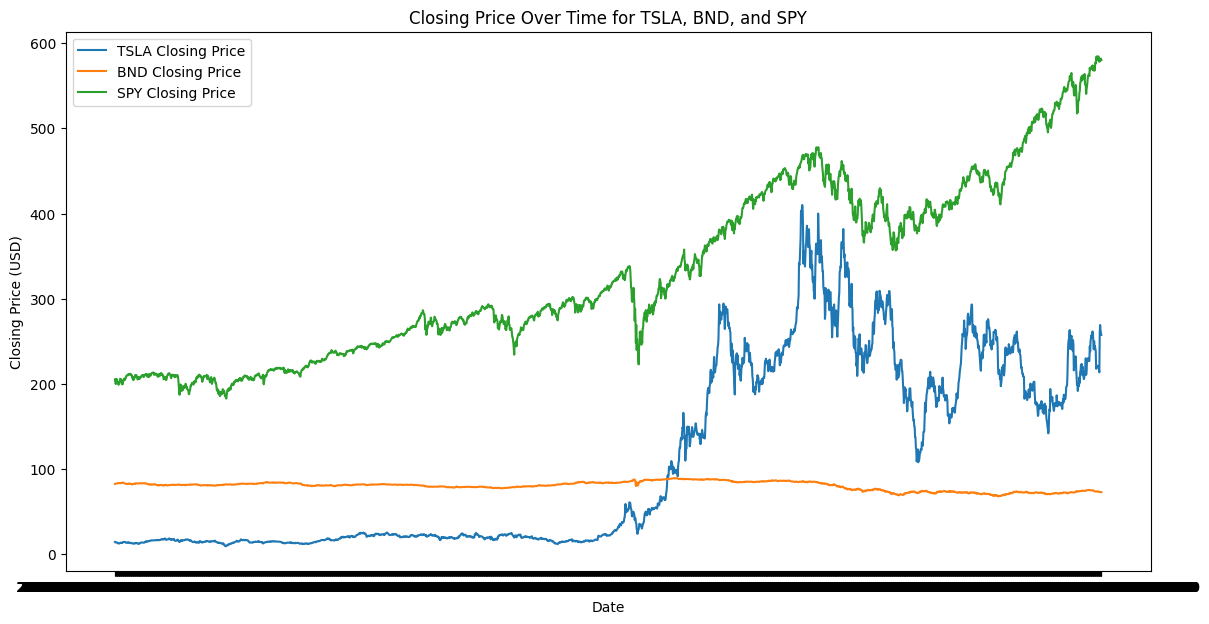

In [9]:
# Plot Closing Price for each asset over time
plt.figure(figsize=(14, 7))
for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker]
    plt.plot(asset_data['Date'], asset_data['Close'], label=f'{ticker} Closing Price')
    
plt.title('Closing Price Over Time for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

## Calculate and Plot Daily Percentage Change for Each Asset to Observe Volatility

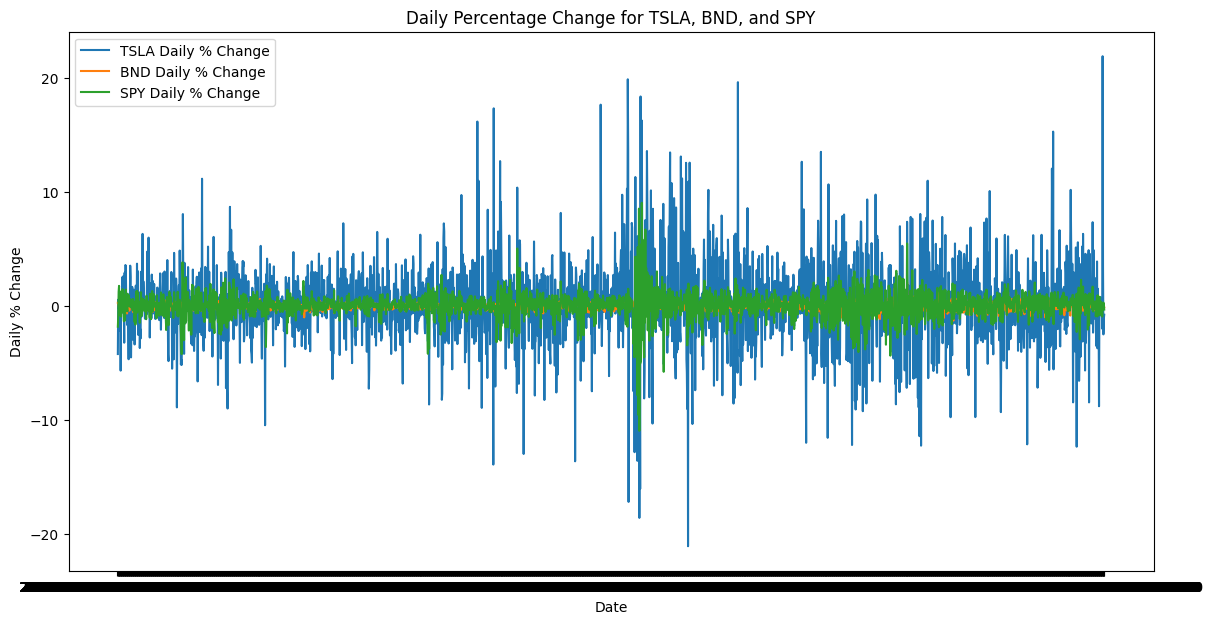

In [10]:
# Calculate daily percentage change for each asset
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change() * 100

# Plot daily percentage change for each asset
plt.figure(figsize=(14, 7))
for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker]
    plt.plot(asset_data['Date'], asset_data['Daily_Return'], label=f'{ticker} Daily % Change')
    
plt.title('Daily Percentage Change for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.show()

## Calculate Rolling Means and Standard Deviations to Analyze Volatility

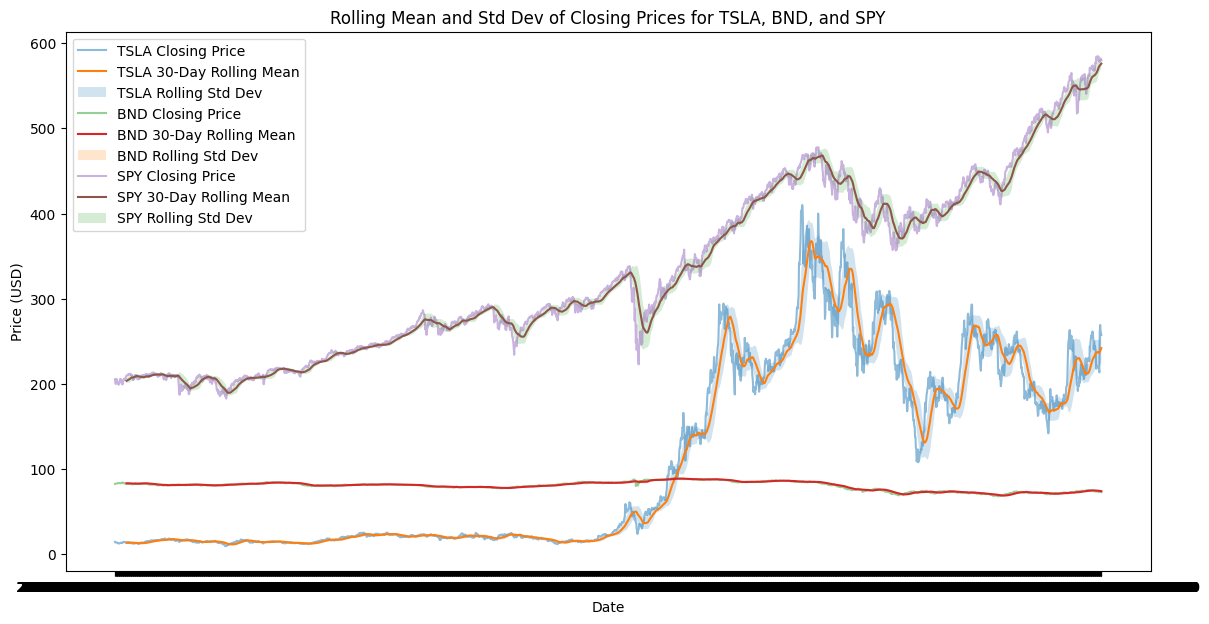

In [11]:
# Calculate rolling mean and standard deviation for each asset
window = 30
df['Rolling_Mean'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=window).mean())
df['Rolling_Std'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=window).std())

# Plot rolling mean and standard deviation for each asset
plt.figure(figsize=(14, 7))
for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker]
    plt.plot(asset_data['Date'], asset_data['Close'], label=f'{ticker} Closing Price', alpha=0.5)
    plt.plot(asset_data['Date'], asset_data['Rolling_Mean'], label=f'{ticker} 30-Day Rolling Mean')
    plt.fill_between(asset_data['Date'], 
                     asset_data['Rolling_Mean'] - asset_data['Rolling_Std'], 
                     asset_data['Rolling_Mean'] + asset_data['Rolling_Std'], 
                     alpha=0.2, label=f'{ticker} Rolling Std Dev')
    
plt.title('Rolling Mean and Std Dev of Closing Prices for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Outlier Detection to Identify Anomalies in Daily Returns

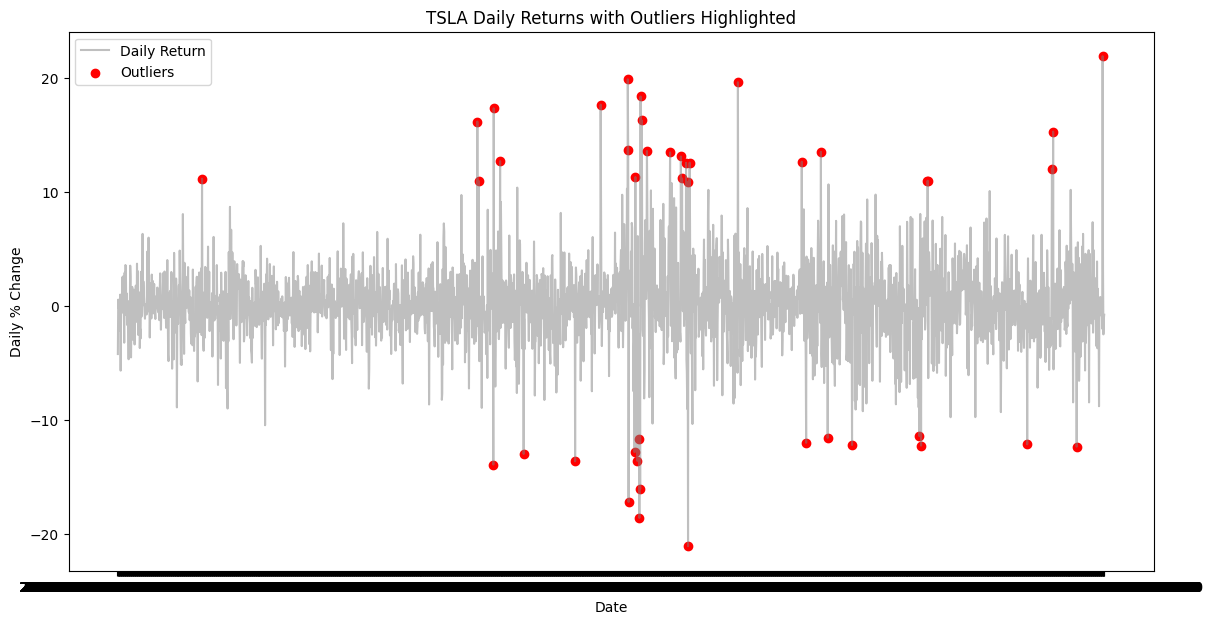

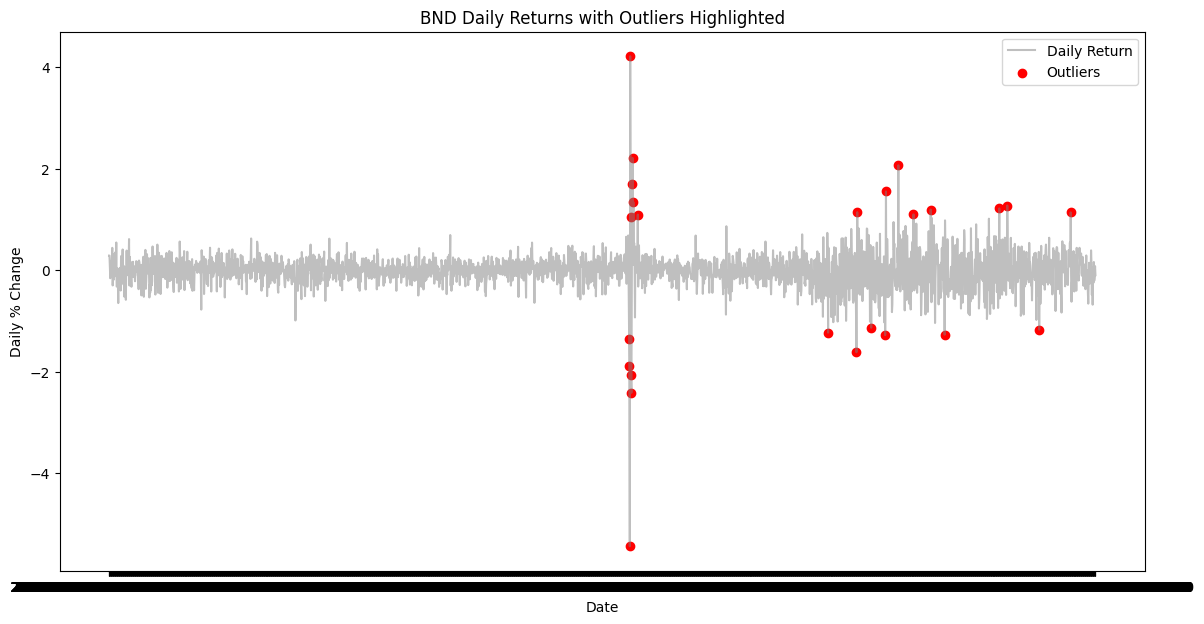

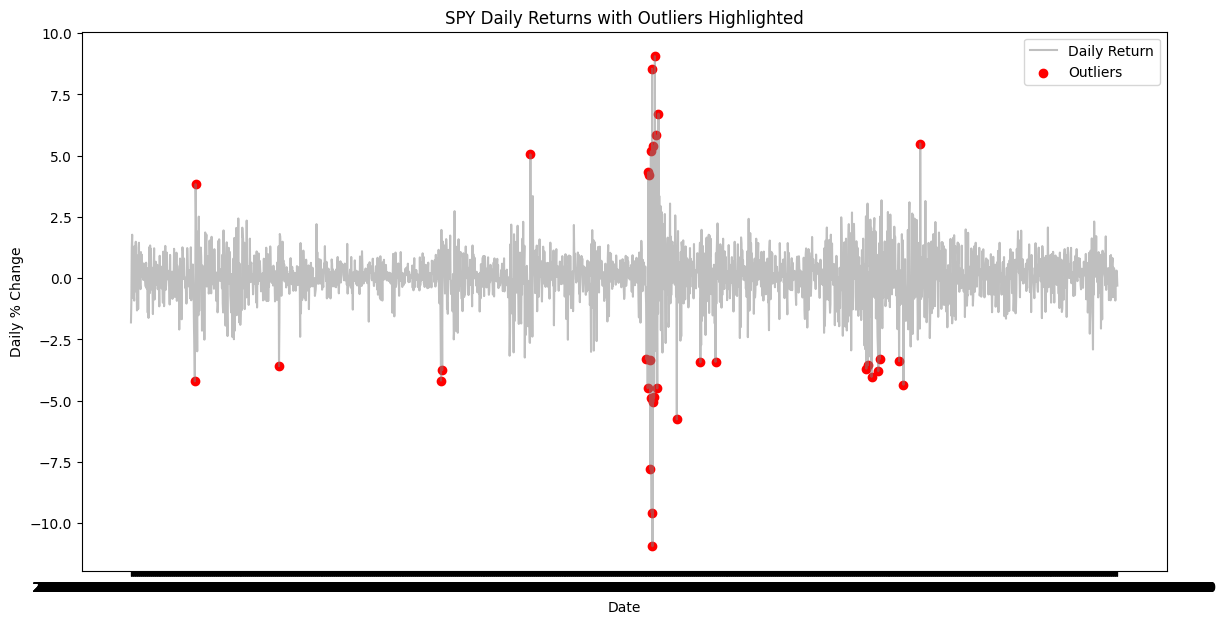

In [12]:
# Define outliers for daily returns
for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker]
    mean_return = asset_data['Daily_Return'].mean()
    std_return = asset_data['Daily_Return'].std()
    outliers = asset_data[(asset_data['Daily_Return'] > mean_return + 3 * std_return) |
                          (asset_data['Daily_Return'] < mean_return - 3 * std_return)]
    
    # Plot daily returns with outliers for each asset
    plt.figure(figsize=(14, 7))
    plt.plot(asset_data['Date'], asset_data['Daily_Return'], label='Daily Return', color='grey', alpha=0.5)
    plt.scatter(outliers['Date'], outliers['Daily_Return'], color='red', label='Outliers')
    plt.title(f'{ticker} Daily Returns with Outliers Highlighted')
    plt.xlabel('Date')
    plt.ylabel('Daily % Change')
    plt.legend()
    plt.show()

## Decompose the Time Series into Trend, Seasonal, and Residual Components

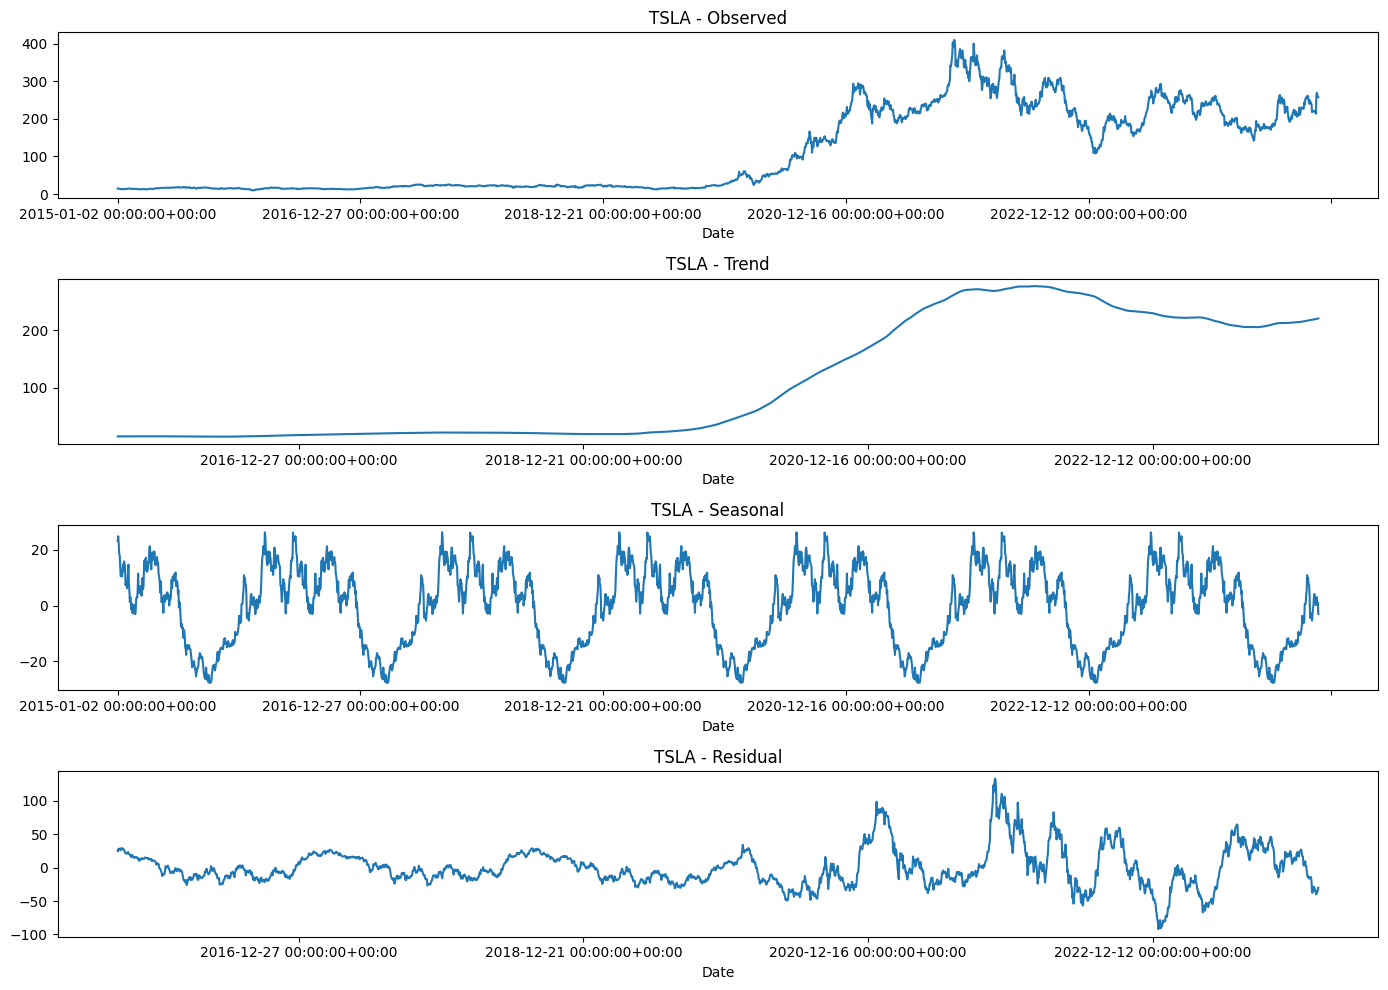

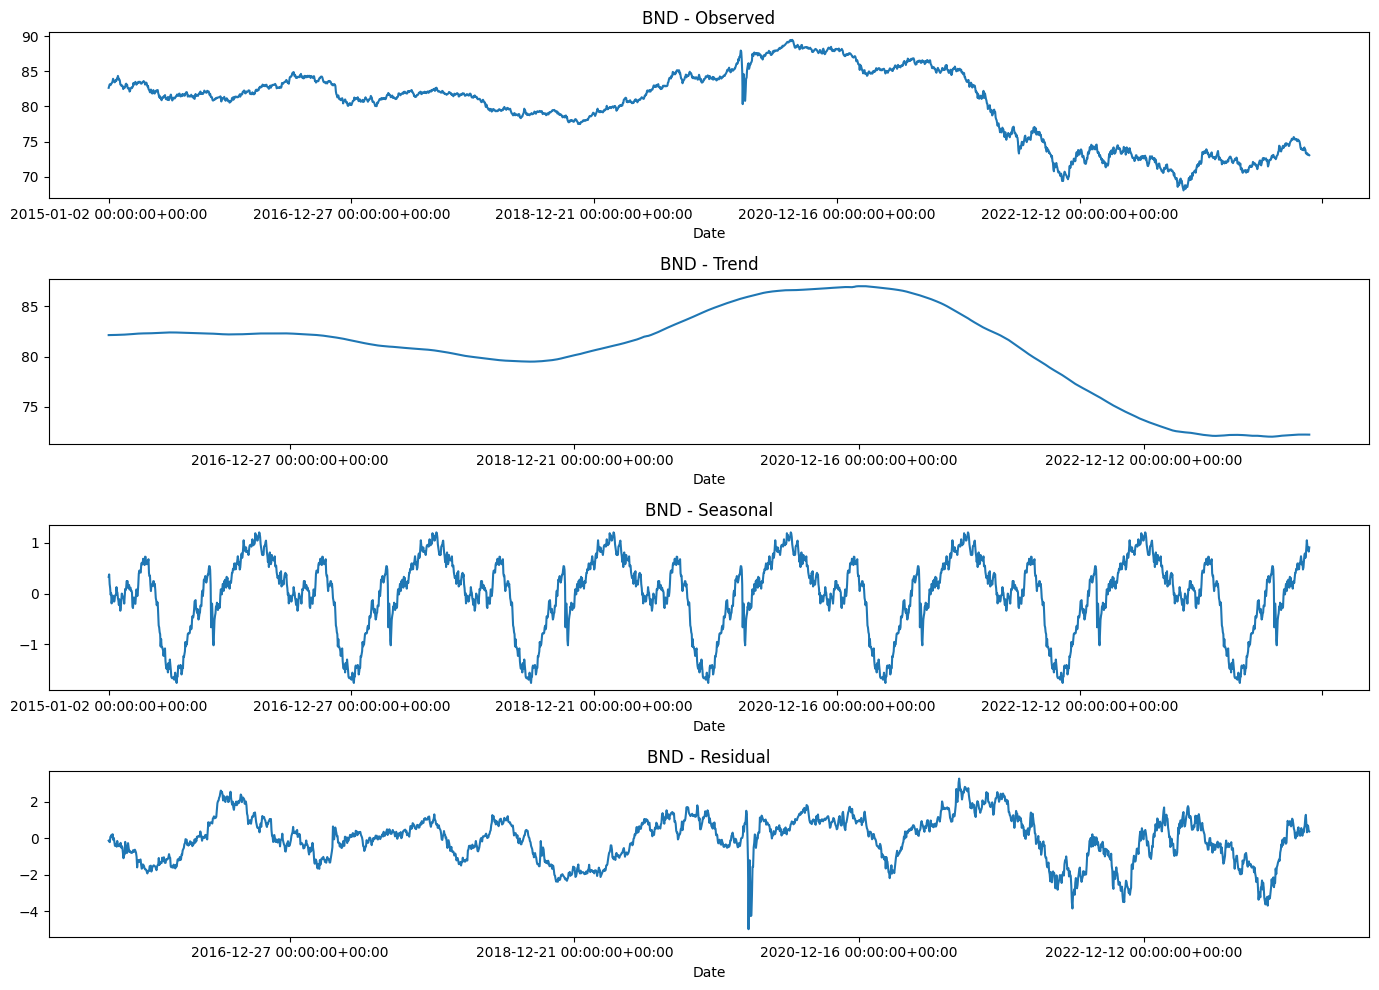

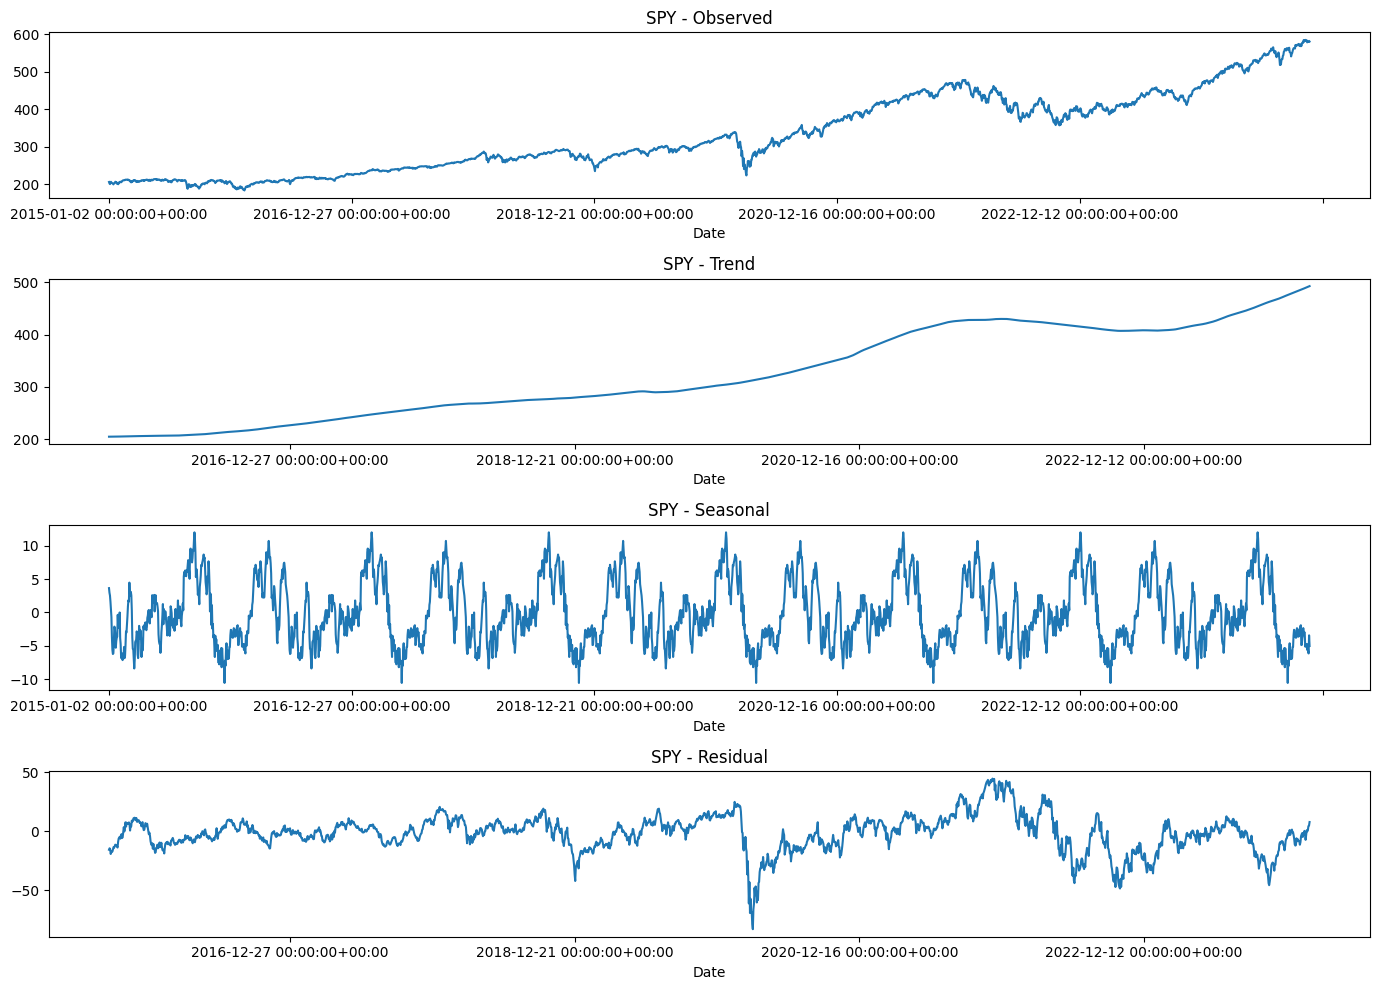

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each asset's time series
for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker].set_index('Date')
    decomposition = seasonal_decompose(asset_data['Close'], model='additive', period=365)
    
    # Plot decomposition for each asset
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
    decomposition.observed.plot(ax=ax1, title=f'{ticker} - Observed')
    decomposition.trend.plot(ax=ax2, title=f'{ticker} - Trend')
    decomposition.seasonal.plot(ax=ax3, title=f'{ticker} - Seasonal')
    decomposition.resid.plot(ax=ax4, title=f'{ticker} - Residual')
    plt.tight_layout()
    plt.show()


### Calculate the Value at Risk (VaR) and Sharpe Ratio for each asset to assess the risk and return characteristics.

In [14]:
# Assume a risk-free rate for Sharpe Ratio calculation
risk_free_rate = 0.01  # 1% risk-free rate

for ticker in df['Ticker'].unique():
    asset_data = df[df['Ticker'] == ticker]
    
    # Value at Risk (VaR) at 5% confidence level
    VaR_5_percent = np.percentile(asset_data['Daily_Return'].dropna(), 5)
    print(f"{ticker} 5% VaR: {VaR_5_percent}%")
    
    # Sharpe Ratio calculation
    annualized_return = asset_data['Daily_Return'].mean() * 252
    annualized_volatility = asset_data['Daily_Return'].std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    print(f"{ticker} Sharpe Ratio: {sharpe_ratio}")

TSLA 5% VaR: -5.125703646165556%
TSLA Sharpe Ratio: 0.7975136368116383
BND 5% VaR: -0.5082926147970168%
BND Sharpe Ratio: -0.20319628390564812
SPY 5% VaR: -1.6798401951985387%
SPY Sharpe Ratio: 0.6844928506438471
